# Question 1 

Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

Step 1 : Import the necessary libraries 

In [8]:
import pandas as pd
import urllib

Step 2. Import the dataset from this address.

In [9]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user' 

Step 3. Assign it to a variable called users

In [10]:
users = pd.read_csv(url)
arr = users['user_id|age|gender|occupation|zip_code'].str.split('|',expand = True)
users['user_id'] = arr[0]
users['age']=arr[1]
users['gender']=arr[2]
users['occupation']=arr[3]
users['zip_code']=arr[4]
users.drop(columns = ['user_id|age|gender|occupation|zip_code'], inplace = True)
users['age']=users['age'].astype(int)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Step 4. Discover what is the mean age per occupation

In [12]:
users.groupby('occupation').mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [13]:
maleRatio = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)

total = maleRatio[['F', 'M']].sum(axis=1)
maleRatio['MaleRatio'] = 100 * maleRatio['M'] / total

maleRatio = maleRatio['MaleRatio'].sort_values(ascending=False)
# result
maleRatio

occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: MaleRatio, dtype: float64

Step 6. For each occupation, calculate the minimum and maximum ages

In [15]:
users.groupby('occupation')['age'].agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 7. For each combination of occupation and sex, calculate the mean age

In [16]:
users.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

Step 8. For each occupation present the percentage of women and men

In [18]:
GenderOccupation = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occupationCount = users.groupby(['occupation']).agg('count')
occupationCount
GenderPercentage = GenderOccupation.div(occupationCount, level = "occupation") * 100
GenderPercentage.loc[:,'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2:

Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start
with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

Step 1. Import the necessary libraries

In [20]:
import pandas as pd

Step 2. Import the dataset from this address.

In [23]:
url1 = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

Step 3. Assign it to a variable called euro12

In [24]:
euro12 = pd.read_csv(url1)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


Step 4. Select only the Goal column

In [25]:
euro12["Goals"]

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012?

In [26]:
teamsCount = len(euro12)
teamsCount

16

Step 6. What is the number of columns in the dataset?

In [27]:
euro12.shape[1]

35

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [28]:
discipline=pd.DataFrame({'Team':euro12['Team'], 'Yellow Cards': euro12['Yellow Cards'],'Red Cards': euro12['Red Cards']})
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [29]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = True)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


Step 9. Calculate the mean Yellow Cards given per Team

In [30]:
perteam= pd.DataFrame(euro12.groupby(['Team'])['Yellow Cards'].mean())
perteam

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


Step 10. Filter teams that scored more than 6 goalsStep

In [31]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Step 11. Select the teams that start with G

In [32]:
gteams=euro12[euro12['Team'].str.startswith('G')]
gteams

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12. Select the first 7 columns

In [33]:
euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13. Select all columns except the last 3

In [34]:
euro12.iloc[:,0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [35]:
Countries = euro12[euro12.Team.isin(['England','Italy','Russia'])]
Countries[['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3:

Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [37]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [51]:
#Step 2. Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
#• The second a random number from 1 to 3
#• The third a random number from 10,000 to 30,000

series1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))     #defining series 1,2, and 3
series2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
series3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print ("series1 is =", series1)    #printing series 1,2, and 3
print ("series 2 is =", series2)
print("series 3 ia =", series3)

series1 is = 0     2
1     1
2     2
3     1
4     3
     ..
95    4
96    4
97    2
98    3
99    2
Length: 100, dtype: int32
series 2 is = 0     2
1     3
2     1
3     1
4     3
     ..
95    1
96    1
97    3
98    2
99    3
Length: 100, dtype: int32
series 3 ia = 0     23078
1     10537
2     25096
3     16365
4     16926
      ...  
95    17257
96    12570
97    10344
98    25362
99    28789
Length: 100, dtype: int32


In [52]:
#Step 3. Create a DataFrame by joinning the Series by column

data_frame = pd.concat([series1, series2, series3], axis=1)   #joining 1,2, and 3 series
print(data_frame)

    0  1      2
0   2  2  23078
1   1  3  10537
2   2  1  25096
3   1  1  16365
4   3  3  16926
.. .. ..    ...
95  4  1  17257
96  4  1  12570
97  2  3  10344
98  3  2  25362
99  2  3  28789

[100 rows x 3 columns]


In [53]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
data_frame.columns = ['bedrs','bathrs','price_sqr_meter']
data_frame.head()

,bedrs,bathrs,price_sqr_meter
0,2,2,23078
1,1,3,10537
2,2,1,25096
3,1,1,16365
4,3,3,16926


In [54]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

# join concat the values
column = pd.concat([series1, series2, series3], axis=0)

# it is still a Series, so we need to transform it to a DataFrame
column = column.to_frame()
print (column)
 
column

        0
0       2
1       1
2       2
3       1
4       3
..    ...
95  17257
96  12570
97  10344
98  25362
99  28789

[300 rows x 1 columns]


,0
0,2
1,1
2,2
3,1
4,3
...,...
95,17257
96,12570
97,10344
98,25362


In [55]:
#Step 6. Ops it seems it is going only until index 99. Is it true?

if (max(column.index)==99):
    print('True')
else:
    print('False')

True


In [56]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299

new_index=[x for x in range(0,300)]
column = pd.concat([series1, series2, series3], axis=0,ignore_index=True)
column = column.to_frame()
column=column.reindex(new_index)
print("column is") 
column

column is


,0
0,2
1,1
2,2
3,1
4,3
...,...
295,17257
296,12570
297,10344
298,25362


# Question 4 :
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on B
January 2 1961) for the first 52 weeks

In [57]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np
import datetime

In [58]:
#Step 2. Import the dataset from this address
read_data = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data", delim_whitespace=True)
read_data.head(10)


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
5,61,1,6,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
6,61,1,7,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
7,61,1,8,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
8,61,1,9,12.58,10.83,10.00,4.75,10.37,6.79,8.04,10.13,7.79,9.08,13.04,15.37
9,61,1,10,13.37,11.12,19.50,8.33,9.71,6.54,11.42,7.79,8.54,9.00,8.58,11.83


In [59]:
# step 3
# Assign it to a variable called data and replace the first 3 columns by a proper datetime index

data = read_data['Yr'].astype(str) + '-' + read_data['Mo'].astype(str) + '-' + read_data['Dy'].astype(str)
read_data.insert(0, 'Date1', data)
data['Date1'] =  pd.to_datetime(read_data['Date1'])
data = read_data.drop(columns = ['Yr', 'Mo', 'Dy'])

data

,Date1,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61-1-1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61-1-2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61-1-3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61-1-4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61-1-5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [60]:
data = read_data.drop(columns = ['Date1'])
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [61]:
#step 4
# Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

#creating a function
def add_2061(x):
    return '2061'+ str(x)

data['Yr'] = data['Yr'].apply(add_2061)
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,206161,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,206161,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,206161,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,206161,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,206161,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,206178,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,206178,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,206178,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,206178,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [62]:
#step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

data.isnull().sum()

Yr     0
Mo     0
Dy     0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [63]:
#step 7 Compute how many non-missing values there are in total
data.notnull().sum()

Yr     6574
Mo     6574
Dy     6574
RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [64]:
#step 8  Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
data.mean(axis=0)

Yr           inf
Mo      6.523274
Dy     15.728628
RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

In [65]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.

loc_stats=data.describe(percentiles=[])
loc_stats.head(10)

,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6574.000000,6574.000000,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,6.523274,15.728628,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,3.448871,8.800335,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,1.000000,1.000000,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,7.000000,16.000000,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,12.000000,31.000000,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [66]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
#A different set of numbers for each day.

day_stats = pd.DataFrame()
day_stats['mean'] = read_data.mean(axis = 1)
day_stats['min'] = read_data.min(axis = 1)
day_stats['max'] = read_data.max(axis = 1)
day_stats['std'] = read_data.std(axis = 1)
round(day_stats, 1)

C:\Users\hitik\AppData\Local\Temp\ipykernel_24648\1201108765.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  day_stats['mean'] = read_data.mean(axis = 1)
C:\Users\hitik\AppData\Local\Temp\ipykernel_24648\1201108765.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  day_stats['min'] = read_data.min(axis = 1)
C:\Users\hitik\AppData\Local\Temp\ipykernel_24648\1201108765.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  day_stats['max'] = read_data.max(axis = 1)
C:\Users\hitik\AppDa

,mean,min,max,std
0,14.7,1.0,61.0,14.2
1,13.5,1.0,61.0,14.4
2,13.8,1.0,61.0,14.4
3,9.7,1.0,61.0,14.6
4,13.0,1.0,61.0,13.7
...,...,...,...,...
6569,21.2,8.1,78.0,17.5
6570,20.0,5.0,78.0,18.5
6571,19.8,8.7,78.0,17.3
6572,20.3,9.1,78.0,17.2


# Question 5 :
    
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [ ]:
#Step 1. Import the necessary libraries
import pandas as pd

In [68]:
#Step 2. Import the dataset from this address.
link = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

In [69]:
#Step 3. Assign it to a variable called chipo.

chipo = pd.read_csv(link, sep='\t')

In [70]:
#Step 4. See the first 10 entries

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [71]:
#Step 5. What is the number of observations in the dataset?


chipo.shape[0]

4622

In [72]:
#Step 6. What is the number of columns in the dataset?
len(chipo.columns)

5

In [73]:
# Step 7. Print the name of all the columns.

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [74]:
#Step 8. How is the dataset indexed?

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [75]:
#Step 9. Which was the most-ordered item?

ordered_item = chipo.item_name.value_counts()
ordered_item

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [76]:
#Step 10. For the most-ordered item, how many items were ordered?

ordered_item[:1]

Chicken Bowl    726
Name: item_name, dtype: int64

In [77]:
#Step 11. What was the most ordered item in the choice_description column?

ch_description = chipo.choice_description.value_counts()
ch_description[:1]

[Diet Coke]    134
Name: choice_description, dtype: int64

In [78]:
# Step 12. How many items were orderd in total?

total = chipo.quantity.sum()
total

4972

In [79]:
#Step 13.
#• Turn the item price into a float
chipo.item_price.str.slice(1).astype(float).head()
chipo.dtypes['item_price']
chipo['item_price'] = chipo.apply(lambda x: float(x['item_price'].replace('$', '')),axis=1)
chipo.dtypes['item_price']

dtype('float64')

In [80]:
#Step 14. How much was the revenue for the period in the dataset?

revenue = chipo['item_price'] * chipo['quantity']
revenue.sum()    

39237.02

In [81]:
#Step 15. How many orders were made in the period?

orders = chipo['order_id'].nunique()
orders

1834

In [82]:
#Step 16. What is the average revenue amount per order?

round(revenue.sum()/orders, 3)

21.394

In [83]:
# Step 17. How many different items are sold?
chipo['item_name'].nunique()

50

# Question 6 :

Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [131]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

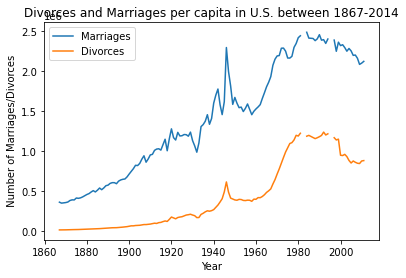

In [132]:
read_data = pd.read_csv(r"C:\Users\hitik\OneDrive\Desktop\us-marriages-divorces-1867-2014.csv")  #reading data from local disk

plt.plot(read_data.Year, read_data['Marriages'], label='Marriages')    #ploting and reading Marriages data
plt.plot(read_data.Year, read_data['Divorces'], label='Divorces')      #ploting and reading Divorces data

plt.title("Divorces and Marriages per capita in U.S. between 1867-2014")    #assigning title, y and x axis label to chart
plt.ylabel(" Number of Marriages/Divorces");
plt.xlabel("Year")

plt.legend();

# Question 7 :

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!


<AxesSubplot:title={'center':'Marriages and Divorces per Capita'}>

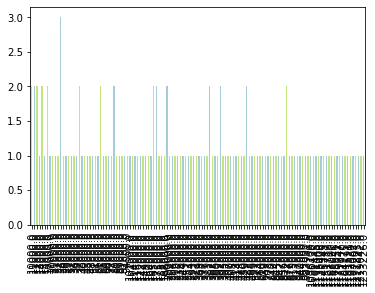

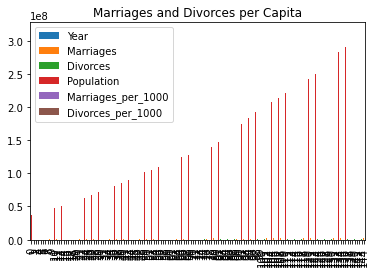

In [129]:
colours = ['#C4E57D','#A4CCD9']
data1['Marriages'].value_counts().sort_index().plot.bar(color=colours)

data1['Divorces'].value_counts().sort_index().plot.bar(color=colours)

data1.plot.bar(title="Marriages and Divorces per Capita")


# Question 8 :
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

In [ ]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt

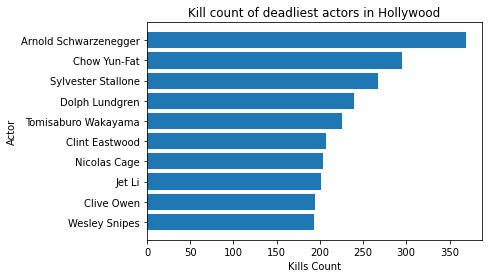

In [133]:
kill_data = pd.read_csv(r"C:\Users\hitik\Downloads\actor_kill_counts.csv")   #reading actor kill counts file from local disk
kill_data = kill_data.sort_values('Count')

plt.barh(kill_data["Actor"], kill_data.Count)

#printing title
plt.title('Kill count of deadliest actors in Hollywood')

#labelling x and y axis
plt.xlabel('Kills Count')
plt.ylabel('Actor')


plt.show()

# Question 9 :

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

In [134]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

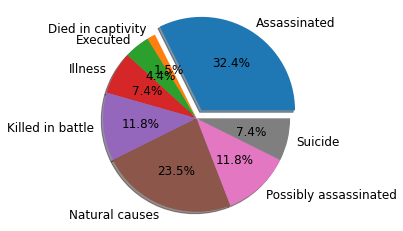

In [135]:
#reading data from local disk
roman_data = pd.read_csv(r"C:\Users\hitik\Downloads\roman-emperor-reigns.csv")
roman= pd.DataFrame({'count' : roman_data.groupby("Cause_of_Death" ).size()}).reset_index() 
labels = roman['Cause_of_Death'].values
sizes = roman['count'].values
x=0.0
y=0.1
explode=[y if item=='Assassinated' else x for item in labels ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=0, textprops={'fontsize':12})
ax1.axis('equal')  
plt.show()

# Question 10 :

Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year

In [142]:
arcade = pd.read_csv(r"C:\Users\hitik\Downloads\arcade-revenue-vs-cs-doctorates.csv")
arcade.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


Text(0, 0.5, 'Doctorates Awarded')

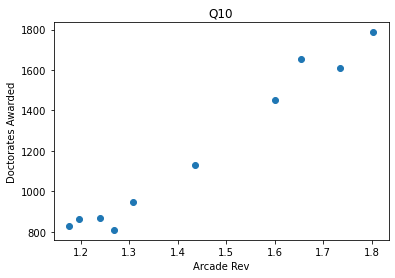

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline


fig, ax = plt.subplots()
ax.scatter(arcade['Total Arcade Revenue (billions)'], arcade['Computer Science Doctorates Awarded (US)'])

ax.set_title('Q10')
ax.set_xlabel('Arcade Rev')
ax.set_ylabel('Doctorates Awarded')

#unable to visualize data with correct color scheme, tried to utilize week 11 instructions unclear